In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('euro2024_data.csv')
df

,id,squad,played90s_wc2022,avgpossession_wc2022,goalsx90_wc2022,assistsx90_wc2022,expgoalsx90_wc2022,diffgoalx90_wc2022,played90s_nl2022,avgpossession_nl2022,...,avgpossession_wc2018,goalsx90_wc2018,assistsx90_wc2018,expgoalsx90_wc2018,diffgoalx90_wc2018,played90s_euro2016,avgpossession_euro2016,goalsx90_euro2016,assistsx90_euro2016,total_90s_played
0,1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,4.0,54.5,...,NaN,NaN,NaN,NaN,NaN,3.0,40.3,0.33,0.33,7.0
1,2,Austria,NaN,NaN,NaN,NaN,NaN,NaN,6.0,43.5,...,NaN,NaN,NaN,NaN,NaN,3.0,54.0,0.33,0.33,13.3
2,3,Belgium,3.0,57.0,0.33,0.33,1.57,-1.24,6.0,62.3,...,52.9,2.14,1.71,1.90,0.24,5.0,52.4,1.80,1.60,26.0
3,4,Croatia,7.7,54.3,1.04,1.04,0.91,0.13,8.7,51.3,...,56.7,1.62,1.00,1.40,0.22,4.3,48.8,1.15,0.92,33.0
4,5,Czech Republic,NaN,NaN,NaN,NaN,NaN,NaN,6.0,35.0,...,NaN,NaN,NaN,NaN,NaN,3.0,42.3,0.67,0.33,14.0
5,6,Denmark,3.0,60.0,0.33,0.33,0.90,-0.57,6.0,47.7,...,43.0,0.69,0.69,0.68,0.01,NaN,NaN,NaN,NaN,19.6
6,7,England,5.0,62.8,2.60,2.20,1.72,0.88,6.0,53.3,...,54.1,1.57,0.78,1.46,0.11,4.0,62.0,1.00,0.25,30.4
7,8,France,7.3,51.3,2.18,1.64,1.88,0.30,6.0,57.7,...,48.3,1.71,0.86,1.30,0.41,7.3,54.4,1.77,1.50,31.9
8,9,Georgia,NaN,NaN,NaN,NaN,NaN,NaN,6.0,52.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
9,10,Germany,3.0,59.3,2.00,1.67,3.35,-1.35,6.0,65.7,...,71.7,0.67,0.67,1.85,-1.18,6.3,66.8,1.11,0.95,22.3


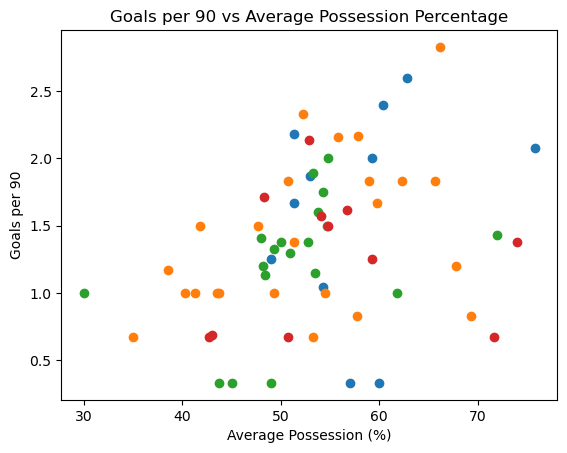

In [32]:
plt.scatter(df['avgpossession_wc2022'], df['goalsx90_wc2022'])
plt.scatter(df['avgpossession_nl2022'], df['goalsx90_nl2022'])
plt.scatter(df['avgpossession_euro2021'], df['goalsx90_euro2021'])
plt.scatter(df['avgpossession_wc2018'], df['goalsx90_wc2018'])
plt.xlabel('Average Possession (%)')
plt.ylabel('Goals per 90')
plt.title('Goals per 90 vs Average Possession Percentage')
plt.show()

<Figure size 640x480 with 0 Axes>

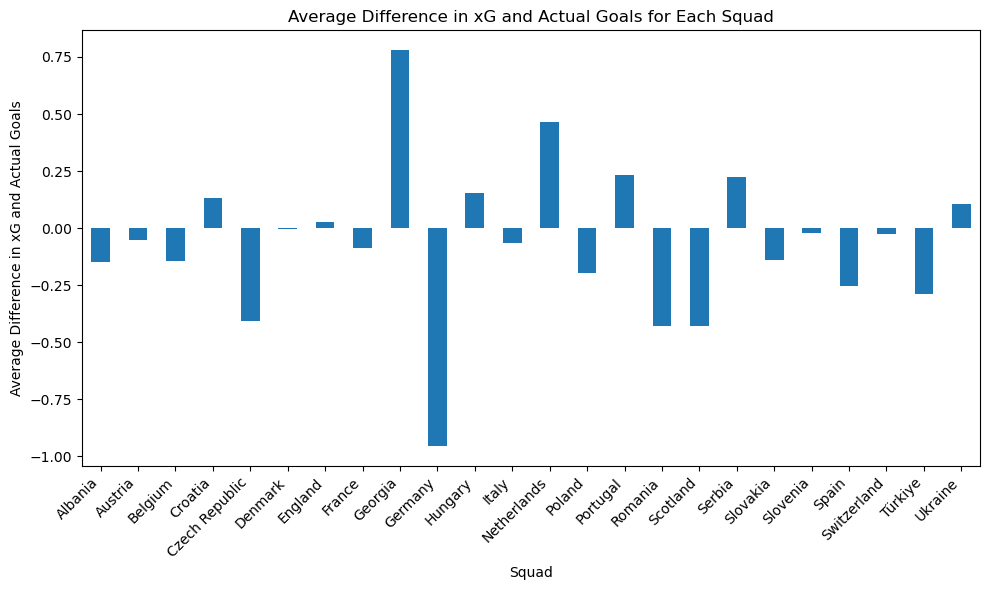

In [33]:
plt.clf()
cols_to_convert = ['diffgoalx90_wc2022', 'diffgoalx90_nl2022', 'diffgoalx90_euro2021', 'diffgoalx90_wc2018']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
df['mean_diff_goals'] = df[cols_to_convert].mean(axis=1, skipna=True)
mean_diff_goals_per_squad = df.groupby('squad')['mean_diff_goals'].mean()
plt.figure(figsize=(10, 6))
mean_diff_goals_per_squad.plot(kind='bar')
plt.xlabel('Squad')
plt.ylabel('Average Difference in xG and Actual Goals')
plt.title('Average Difference in xG and Actual Goals for Each Squad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

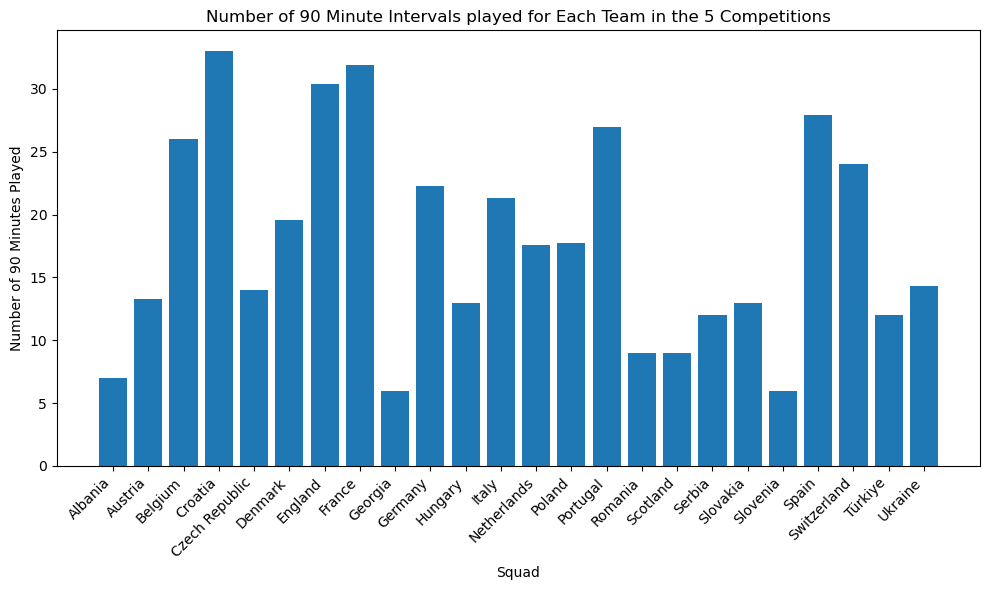

In [37]:
plt.clf()
team_names = df['squad']
sums = df['total_90s_played']
plt.figure(figsize=(10, 6))
plt.bar(team_names, sums)
plt.xlabel('Squad')
plt.ylabel('Number of 90 Minutes Played')
plt.title('Number of 90 Minute Intervals played for Each Team in the 5 Competitions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

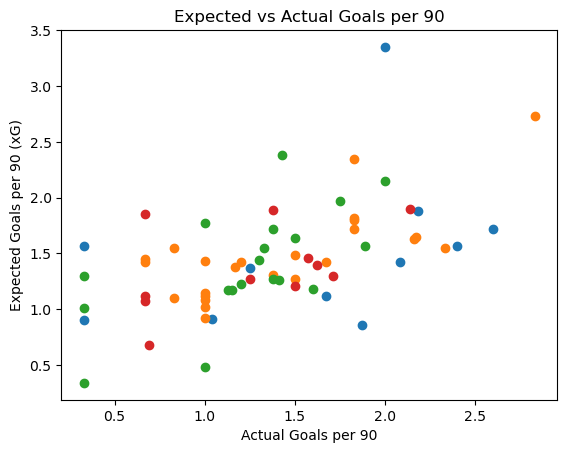

In [38]:
plt.clf()
plt.scatter(df['goalsx90_wc2022'], df['expgoalsx90_wc2022'])
plt.scatter(df['goalsx90_nl2022'], df['expgoalsx90_nl2022'])
plt.scatter(df['goalsx90_euro2021'], df['expgoalsx90_euro2021'])
plt.scatter(df['goalsx90_wc2018'], df['expgoalsx90_wc2018'])
plt.xlabel('Actual Goals per 90')
plt.ylabel('Expected Goals per 90 (xG)')
plt.title('Expected vs Actual Goals per 90')
plt.show()

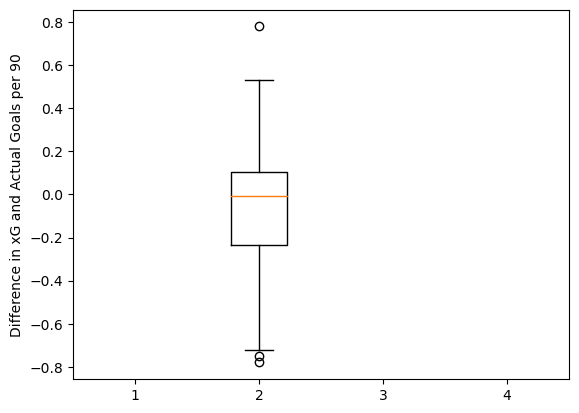

In [46]:
plt.clf()
columns = ['diffgoalx90_wc2022', 'diffgoalx90_nl2022', 'diffgoalx90_euro2021', 'diffgoalx90_wc2018']
diff = df[columns]
plt.boxplot(diff)
plt.ylabel('Difference in xG and Actual Goals per 90')
plt.show()